/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


    test-merror-mean  test-merror-std  test-mlogloss-mean  test-mlogloss-std  \
0           0.501127         0.045501            1.335642           0.010655   
1           0.450947         0.065295            1.297017           0.014044   
2           0.456622         0.043959            1.262438           0.019655   
3           0.420107         0.045102            1.232438           0.024308   
4           0.440065         0.037232            1.206267           0.028579   
5           0.428913         0.042856            1.181800           0.032505   
6           0.434319         0.048986            1.159478           0.033067   
7           0.426060         0.035334            1.141985           0.036843   
8           0.426331         0.033490            1.125117           0.045223   
9           0.440303         0.045949            1.111105           0.046604   
10          0.417680         0.039222            1.098908           0.050672   
11          0.409381         0.045117   

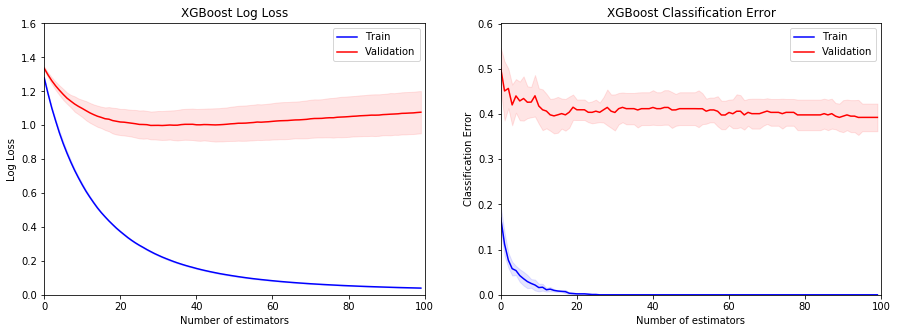

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics  
from sklearn.grid_search import GridSearchCV   
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

#import data
dataframe = pd.read_excel('split_database_901_3.xlsx')

#split the dataset into the features and the label
dataframe_feature=dataframe.iloc[:,0:dataframe.shape[1]-1]
dataframe_label=dataframe.iloc[:,dataframe.shape[1]-1]

X = dataframe_feature.values
Y = dataframe_label.values

seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

x_train_df = pd.DataFrame(x_train, columns=dataframe_feature.columns)
y_train_df =  pd.DataFrame({'panss_label': y_train})
x_test_df = pd.DataFrame(x_test, columns=dataframe_feature.columns)
y_test_df =  pd.DataFrame({'panss_label': y_test})

train = x_train_df
train['panss_label'] = y_train
test = x_test_df
test['panss_label'] = y_test

target = 'panss_label'
predictors = [x for x in dataframe.columns if x not in [target]]

train_xgb = xgb.DMatrix(train[predictors].values, label=train[target].values)

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7)

cvresult = xgb.cv(xgb1.get_xgb_params(), train_xgb, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5, stratified=True, shuffle=True,
            metrics=('mlogloss', 'merror'))
print cvresult

plt.figure(figsize=(15, 5))

# plot log loss
plt.subplot(121)
plt.plot(range(0, cvresult.shape[0]), cvresult['train-mlogloss-mean'], 'b', label='Train')
plt.plot(range(0, cvresult.shape[0]), cvresult['test-mlogloss-mean'], 'r', label='Validation')
plt.fill_between(range(0, cvresult.shape[0]), 
                 cvresult['train-mlogloss-mean']-cvresult['train-mlogloss-std'],cvresult['train-mlogloss-mean']+cvresult['train-mlogloss-std'], 
                 color = 'b', alpha=.1)
plt.fill_between(range(0, cvresult.shape[0]), 
                 cvresult['test-mlogloss-mean']-cvresult['test-mlogloss-std'],cvresult['test-mlogloss-mean']+cvresult['test-mlogloss-std'], 
                color = 'r', alpha=.1)
plt.legend()
plt.ylim((0,max(cvresult['train-mlogloss-mean'].max(), cvresult['test-mlogloss-mean'].max())*1.2))
plt.xlim((0, cvresult.shape[0]))
plt.ylabel('Log Loss')
plt.xlabel('Number of estimators')
plt.title('XGBoost Log Loss')

# plot classification error
plt.subplot(122)
plt.plot(range(0, cvresult.shape[0]), cvresult['train-merror-mean'], 'b', label='Train')
plt.plot(range(0, cvresult.shape[0]), cvresult['test-merror-mean'], 'r', label='Validation')
plt.fill_between(range(0, cvresult.shape[0]), 
                 cvresult['train-merror-mean']-cvresult['train-merror-std'],cvresult['train-merror-mean']+cvresult['train-merror-std'], 
                 color = 'b', alpha=.1)
plt.fill_between(range(0, cvresult.shape[0]), 
                 cvresult['test-merror-mean']-cvresult['test-merror-std'],cvresult['test-merror-mean']+cvresult['test-merror-std'], 
                color = 'r', alpha=.1)
plt.legend()
plt.ylim((0,max(cvresult['train-merror-mean'].max(), cvresult['test-merror-mean'].max())*1.2))
plt.xlim((0, cvresult.shape[0]))
plt.ylabel('Classification Error')
plt.xlabel('Number of estimators')
plt.title('XGBoost Classification Error')

plt.savefig('less_features_xgboostcv.png', dpi=300)

In [2]:
cvresult[cvresult['test-mlogloss-mean']==cvresult['test-mlogloss-mean'].min()]

,test-merror-mean,test-merror-std,test-mlogloss-mean,test-mlogloss-std,train-merror-mean,train-merror-std,train-mlogloss-mean,train-mlogloss-std
31,0.411849,0.034677,0.998289,0.085202,0.0,0.0,0.222801,0.003774


In [4]:
import warnings
warnings.filterwarnings("ignore")

xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=31,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7)

choose_param_2 = {
 'max_depth': range(1, 6, 2),
 'min_child_weight': range(1, 6, 2)
}
best_estimator_2 = GridSearchCV(estimator = xgb2, param_grid = choose_param_2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_2.fit(train[predictors], train[target])
print('每轮迭代运行结果:{0}'.format(best_estimator_2.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_2.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_2.best_score_))

每轮迭代运行结果:[mean: 0.56016, std: 0.02202, params: {'max_depth': 1, 'min_child_weight': 1}, mean: 0.56016, std: 0.02202, params: {'max_depth': 1, 'min_child_weight': 3}, mean: 0.54345, std: 0.02310, params: {'max_depth': 1, 'min_child_weight': 5}, mean: 0.63562, std: 0.02443, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.61597, std: 0.02170, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.62423, std: 0.01600, params: {'max_depth': 3, 'min_child_weight': 5}, mean: 0.62705, std: 0.02235, params: {'max_depth': 5, 'min_child_weight': 1}, mean: 0.62145, std: 0.01681, params: {'max_depth': 5, 'min_child_weight': 3}, mean: 0.59894, std: 0.02951, params: {'max_depth': 5, 'min_child_weight': 5}]
参数的最佳取值：{'max_depth': 3, 'min_child_weight': 1}
最佳模型得分:0.635623578569


In [11]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=31,
 max_depth=5,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7)

choose_param_3 = {
 'max_depth': [2, 3, 4],
 'min_child_weight': [1, 2, 3]
}
best_estimator_3 = GridSearchCV(estimator = xgb3, param_grid = choose_param_3, scoring='accuracy', n_jobs=4, iid=False, cv=5)
best_estimator_3.fit(train[predictors], train[target])
print('每轮迭代运行结果:{0}'.format(best_estimator_3.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_3.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_3.best_score_))

每轮迭代运行结果:[mean: 0.62674, std: 0.02220, params: {'max_depth': 2, 'min_child_weight': 1}, mean: 0.61311, std: 0.02389, params: {'max_depth': 2, 'min_child_weight': 2}, mean: 0.61049, std: 0.04790, params: {'max_depth': 2, 'min_child_weight': 3}, mean: 0.63562, std: 0.02443, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.62987, std: 0.01864, params: {'max_depth': 3, 'min_child_weight': 2}, mean: 0.61597, std: 0.02170, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.62713, std: 0.02435, params: {'max_depth': 4, 'min_child_weight': 1}, mean: 0.62122, std: 0.01230, params: {'max_depth': 4, 'min_child_weight': 2}, mean: 0.61045, std: 0.02279, params: {'max_depth': 4, 'min_child_weight': 3}]
参数的最佳取值：{'max_depth': 3, 'min_child_weight': 1}
最佳模型得分:0.635623578569


In [12]:
xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=31,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7)

choose_param_4 = {
'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}
best_estimator_4 = GridSearchCV(estimator = xgb4, param_grid = choose_param_4, scoring='accuracy', n_jobs=-1, iid=False, cv=5)
best_estimator_4.fit(train[predictors], train[target])
print('每轮迭代运行结果:{0}'.format(best_estimator_4.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_4.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_4.best_score_))

每轮迭代运行结果:[mean: 0.63562, std: 0.02443, params: {'gamma': 0.0}, mean: 0.63277, std: 0.02250, params: {'gamma': 0.1}, mean: 0.62999, std: 0.02704, params: {'gamma': 0.2}, mean: 0.62991, std: 0.01783, params: {'gamma': 0.3}, mean: 0.63277, std: 0.02061, params: {'gamma': 0.4}, mean: 0.62705, std: 0.01397, params: {'gamma': 0.5}, mean: 0.62705, std: 0.01397, params: {'gamma': 0.6}]
参数的最佳取值：{'gamma': 0.0}
最佳模型得分:0.635623578569


In [14]:
xgb5 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=31,
 max_depth=3,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7)

choose_param_5 = {
'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}
best_estimator_5 = GridSearchCV(estimator = xgb5, param_grid = choose_param_5, scoring='accuracy', n_jobs=-1, iid=False, cv=5)
best_estimator_5.fit(train[predictors], train[target])
print('每轮迭代运行结果:{0}'.format(best_estimator_5.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_5.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_5.best_score_))

每轮迭代运行结果:[mean: 0.61339, std: 0.03391, params: {'subsample': 0.6, 'colsample_bytree': 0.6}, mean: 0.61088, std: 0.04639, params: {'subsample': 0.7, 'colsample_bytree': 0.6}, mean: 0.62428, std: 0.02518, params: {'subsample': 0.8, 'colsample_bytree': 0.6}, mean: 0.61582, std: 0.01404, params: {'subsample': 0.9, 'colsample_bytree': 0.6}, mean: 0.61887, std: 0.02471, params: {'subsample': 1.0, 'colsample_bytree': 0.6}, mean: 0.59104, std: 0.03092, params: {'subsample': 0.6, 'colsample_bytree': 0.7}, mean: 0.62677, std: 0.02139, params: {'subsample': 0.7, 'colsample_bytree': 0.7}, mean: 0.60760, std: 0.02121, params: {'subsample': 0.8, 'colsample_bytree': 0.7}, mean: 0.63836, std: 0.02571, params: {'subsample': 0.9, 'colsample_bytree': 0.7}, mean: 0.60466, std: 0.01400, params: {'subsample': 1.0, 'colsample_bytree': 0.7}, mean: 0.61050, std: 0.02713, params: {'subsample': 0.6, 'colsample_bytree': 0.8}, mean: 0.58548, std: 0.02870, params: {'subsample': 0.7, 'colsample_bytree': 0.8}, mean: 

In [15]:
xgb6 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=31,
 max_depth=3,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7)

choose_param_6 = {
'subsample': [i/100.0 for i in range(80,95,5)], 'colsample_bytree': [i/100.0 for i in range(75,90,5)]
}
best_estimator_6 = GridSearchCV(estimator = xgb6, param_grid = choose_param_6, scoring='accuracy', n_jobs=-1, iid=False, cv=5)
best_estimator_6.fit(train[predictors], train[target])
print('每轮迭代运行结果:{0}'.format(best_estimator_6.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_6.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_6.best_score_))

每轮迭代运行结果:[mean: 0.61296, std: 0.01939, params: {'subsample': 0.8, 'colsample_bytree': 0.75}, mean: 0.63856, std: 0.03160, params: {'subsample': 0.85, 'colsample_bytree': 0.75}, mean: 0.64685, std: 0.03168, params: {'subsample': 0.9, 'colsample_bytree': 0.75}, mean: 0.63562, std: 0.02443, params: {'subsample': 0.8, 'colsample_bytree': 0.8}, mean: 0.62173, std: 0.02652, params: {'subsample': 0.85, 'colsample_bytree': 0.8}, mean: 0.64107, std: 0.02648, params: {'subsample': 0.9, 'colsample_bytree': 0.8}, mean: 0.61864, std: 0.01804, params: {'subsample': 0.8, 'colsample_bytree': 0.85}, mean: 0.59953, std: 0.03125, params: {'subsample': 0.85, 'colsample_bytree': 0.85}, mean: 0.63836, std: 0.02761, params: {'subsample': 0.9, 'colsample_bytree': 0.85}]
参数的最佳取值：{'subsample': 0.9, 'colsample_bytree': 0.75}
最佳模型得分:0.646851078084


In [16]:
xgb7 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=31,
 max_depth=3,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.75,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7)

choose_param_7 = {
'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100], 'reg_lambda': [1e-5, 1e-2, 0.1, 1, 100]
}
best_estimator_7 = GridSearchCV(estimator = xgb7, param_grid = choose_param_7, scoring='accuracy', n_jobs=-1, iid=False, cv=5)
best_estimator_7.fit(train[predictors], train[target])
print('每轮迭代运行结果:{0}'.format(best_estimator_7.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_7.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_7.best_score_))

每轮迭代运行结果:[mean: 0.63524, std: 0.01335, params: {'reg_alpha': 1e-05, 'reg_lambda': 1e-05}, mean: 0.63543, std: 0.01621, params: {'reg_alpha': 1e-05, 'reg_lambda': 0.01}, mean: 0.63272, std: 0.02980, params: {'reg_alpha': 1e-05, 'reg_lambda': 0.1}, mean: 0.64685, std: 0.03168, params: {'reg_alpha': 1e-05, 'reg_lambda': 1}, mean: 0.53503, std: 0.01690, params: {'reg_alpha': 1e-05, 'reg_lambda': 100}, mean: 0.64654, std: 0.01964, params: {'reg_alpha': 0.01, 'reg_lambda': 1e-05}, mean: 0.65500, std: 0.02669, params: {'reg_alpha': 0.01, 'reg_lambda': 0.01}, mean: 0.63581, std: 0.03877, params: {'reg_alpha': 0.01, 'reg_lambda': 0.1}, mean: 0.64423, std: 0.03991, params: {'reg_alpha': 0.01, 'reg_lambda': 1}, mean: 0.53503, std: 0.01690, params: {'reg_alpha': 0.01, 'reg_lambda': 100}, mean: 0.62991, std: 0.02800, params: {'reg_alpha': 0.1, 'reg_lambda': 1e-05}, mean: 0.63280, std: 0.03648, params: {'reg_alpha': 0.1, 'reg_lambda': 0.01}, mean: 0.65230, std: 0.03892, params: {'reg_alpha': 0.1, 'r

In [17]:
xgb8 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=31,
 max_depth=3,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.75,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7,
 reg_alpha = 0.01,
 reg_lambda = 0.01)

choose_param_8 = {
'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}
best_estimator_8 = GridSearchCV(estimator = xgb8, param_grid = choose_param_8, scoring='accuracy', n_jobs=-1, iid=False, cv=5)
best_estimator_8.fit(train[predictors], train[target])
print('每轮迭代运行结果:{0}'.format(best_estimator_8.grid_scores_))
print('参数的最佳取值：{0}'.format(best_estimator_8.best_params_))
print('最佳模型得分:{0}'.format(best_estimator_8.best_score_))

每轮迭代运行结果:[mean: 0.62968, std: 0.02249, params: {'learning_rate': 0.01}, mean: 0.63231, std: 0.02451, params: {'learning_rate': 0.05}, mean: 0.65766, std: 0.01612, params: {'learning_rate': 0.07}, mean: 0.65500, std: 0.02669, params: {'learning_rate': 0.1}, mean: 0.60459, std: 0.01605, params: {'learning_rate': 0.2}]
参数的最佳取值：{'learning_rate': 0.07}
最佳模型得分:0.657661888895


In [18]:
from sklearn.metrics import accuracy_score

xgb_final = XGBClassifier(
 learning_rate =0.07,
 n_estimators=31,
 max_depth=3,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.75,
 objective= 'multi:softprob',
 num_class = 4,
 scale_pos_weight=1,
 seed=7,
 reg_alpha = 0.01,
 reg_lambda = 0.01)

xgb_final.fit(x_train, y_train)

y_pred = xgb_final.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.97%


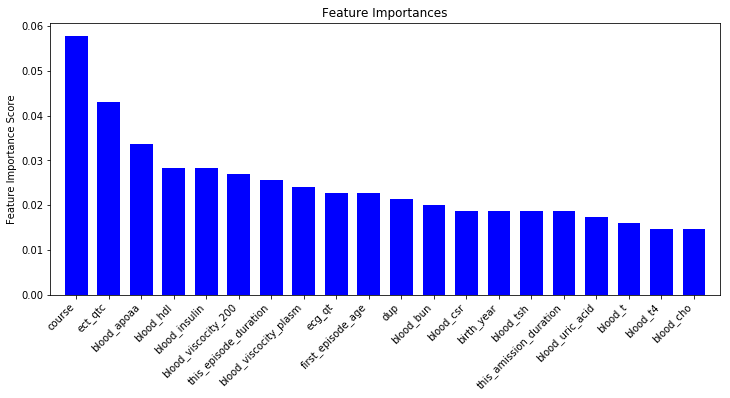

In [19]:
feat_imp = pd.DataFrame(xgb_final.feature_importances_, index=dataframe_feature.columns)
feat_imp_top = feat_imp.sort_values(by=[0], ascending=False).iloc[0:20,:]
plt.figure(figsize=(12,5))
plt.bar(np.array(feat_imp_top.index), np.array(feat_imp_top.values.T)[0], color='b', width=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlim((-0.8, 19.8))
plt.ylabel('Feature Importance Score')
plt.title('Feature Importances')
plt.savefig('less_features_feature_importance.png', dpi=300)

Confusion matrix, without normalization
[[94  0  0  1]
 [21  3  4  2]
 [ 5  2 17  1]
 [14  2 10  1]]


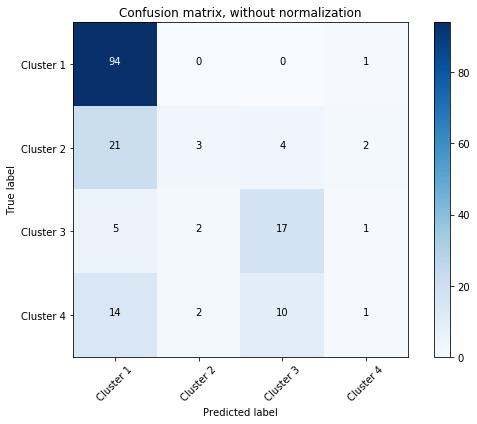

Normalized confusion matrix
[[0.98947368 0.         0.         0.01052632]
 [0.7        0.1        0.13333333 0.06666667]
 [0.2        0.08       0.68       0.04      ]
 [0.51851852 0.07407407 0.37037037 0.03703704]]


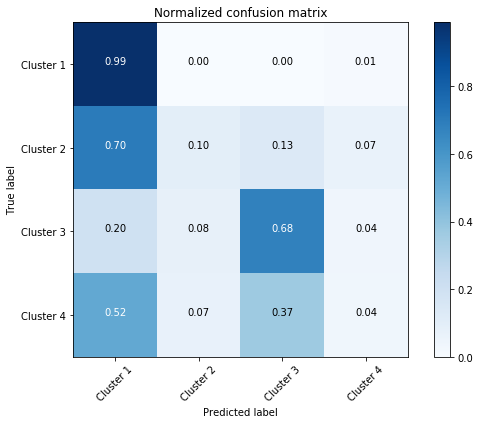

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_test, predictions)
class_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('less_features_confusion_matrix_without_norm.png', dpi=300)
plt.show()

plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('less_features_confusion_matrix_with_norm.png', dpi=300)
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=class_names))

             precision    recall  f1-score   support

  Cluster 1       0.70      0.99      0.82        95
  Cluster 2       0.43      0.10      0.16        30
  Cluster 3       0.55      0.68      0.61        25
  Cluster 4       0.20      0.04      0.06        27

avg / total       0.56      0.65      0.56       177



In [22]:
from sklearn.metrics import precision_recall_fscore_support
print 'macro:', precision_recall_fscore_support(y_test, predictions, average='macro')
print 'micro:', precision_recall_fscore_support(y_test, predictions, average='micro')
print 'weighted:', precision_recall_fscore_support(y_test, predictions, average='weighted')

macro: (0.46961276566476373, 0.4516276803118909, 0.4131914294987439, None)
micro: (0.6497175141242938, 0.6497175141242938, 0.6497175141242938, None)
weighted: (0.5571107984252759, 0.6497175141242938, 0.5634022749660008, None)


In [23]:
y_predprob = xgb_final.predict_proba(x_test)

Average precision score, micro-averaged over all classes: 0.67
Average precision score, macro-averaged over all classes: 0.51
Average precision score, weighted-averaged over all classes: 0.61


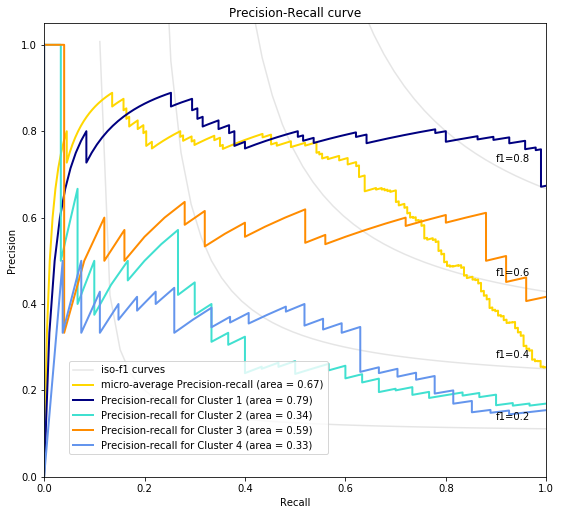

In [24]:
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
pr_precision = dict()
pr_recall = dict()
pr_average_precision = dict()
for i in range(0, 4):
    pr_precision[i], pr_recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_predprob[:, i])
    pr_average_precision[i] = average_precision_score(y_test_binarized[:, i], y_predprob[:, i])

# A "micro-average": quantifying score on all classes jointly
pr_precision["micro"], pr_recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(),
    y_predprob.ravel())
pr_average_precision["micro"] = average_precision_score(y_test_binarized, y_predprob,
                                                     average="micro")
pr_average_precision["macro"] = average_precision_score(y_test_binarized, y_predprob,
                                                     average="macro")
pr_average_precision["weighted"] = average_precision_score(y_test_binarized, y_predprob,
                                                     average="weighted")

print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(pr_average_precision["micro"]))
print('Average precision score, macro-averaged over all classes: {0:0.2f}'
      .format(pr_average_precision["macro"]))
print('Average precision score, weighted-averaged over all classes: {0:0.2f}'
      .format(pr_average_precision["weighted"]))

from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(9, 10))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(pr_recall["micro"], pr_precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(pr_average_precision["micro"]))

for i, color in zip(range(0, 4), colors):
    l, = plt.plot(pr_recall[i], pr_precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for Cluster {0} (area = {1:0.2f})'
                  ''.format(i+1, pr_average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(lines, labels, loc=(0.05, 0.05), prop=dict(size=10))
plt.savefig('less_features_pr_curve.png', dpi=300)

AUC, micro-averaged over all classes: 0.85
AUC, macro-averaged over all classes: 0.77
AUC, weighted-averaged over all classes: 0.80


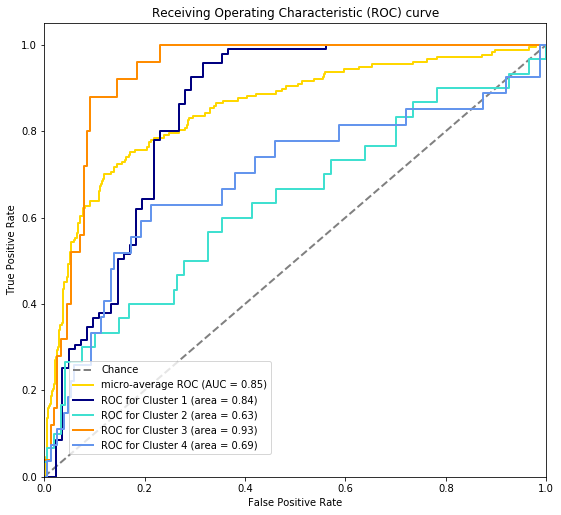

In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# For each class
roc_fpr = dict()
roc_tpr = dict()
roc_auc = dict()

for i in range(0, 4):
    roc_fpr[i], roc_tpr[i], _ = roc_curve(y_test_binarized[:, i],
                                                        y_predprob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_predprob[:, i])

# A "micro-average": quantifying score on all classes jointly
roc_fpr["micro"], roc_tpr["micro"], _ = roc_curve(y_test_binarized.ravel(),
    y_predprob.ravel())
roc_auc["micro"] = roc_auc_score(y_test_binarized, y_predprob,
                                                     average="micro")
roc_auc["macro"] = roc_auc_score(y_test_binarized, y_predprob,
                                                     average="macro")
roc_auc["weighted"] = roc_auc_score(y_test_binarized, y_predprob,
                                                     average="weighted")

print('AUC, micro-averaged over all classes: {0:0.2f}'
      .format(roc_auc["micro"]))
print('AUC, macro-averaged over all classes: {0:0.2f}'
      .format(roc_auc["macro"]))
print('AUC, weighted-averaged over all classes: {0:0.2f}'
      .format(roc_auc["weighted"]))

from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(9, 10))

f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []

l, = plt.plot([0,1], [0,1], '--', color='grey', lw=2)
lines.append(l)
labels.append('Chance')

l, = plt.plot(roc_fpr["micro"], roc_tpr["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average ROC (AUC = {0:0.2f})'
              ''.format(roc_auc["micro"]))

for i, color in zip(range(0, 4), colors):
    l, = plt.plot(roc_fpr[i], roc_tpr[i], color=color, lw=2)
    lines.append(l)
    labels.append('ROC for Cluster {0} (area = {1:0.2f})'
                  ''.format(i+1, roc_auc[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiving Operating Characteristic (ROC) curve')
plt.legend(lines, labels, loc=(0.05, 0.05), prop=dict(size=10))
plt.savefig('less_features_roc_curve.png', dpi=300)